In [1]:
!nvidia-smi

Sat Apr 30 09:44:47 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 352.79     Driver Version: 352.79         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 0000:04:00.0     Off |                    0 |
| N/A   39C    P0    59W / 149W |   8083MiB / 11519MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K80           Off  | 0000:05:00.0     Off |                    0 |
| N/A   25C    P8    30W / 149W |     55MiB / 11519MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
import scipy.io as sio
import numpy
import os
import cv2
import sys
import re
import PIL
import Image
import glob
import math

import matplotlib
matplotlib.use('Agg')

from pylab import *
%matplotlib inline

start_dir = os.getcwd()

In [3]:
img = cv2.imread('FR3_10m_2013_UNCW_RAW.png')

In [4]:
print img.shape

(9716, 16701, 3)


In [5]:
b,g,r = cv2.split(img)

(304, 522, 3)


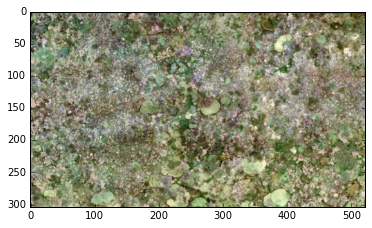

In [6]:
lower_reso = cv2.pyrDown(img)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
print lower_reso.shape

imshow(lower_reso)

In [7]:
print os.listdir(start_dir)
dir_contents = os.listdir(start_dir)
print len(dir_contents)

['FR9_10mA_2013_UNCW_ALL.png', 'FR3_10m_2013_UNCW_MORPHS.png', 'FR9_10mA_2012_UNCW_RAW.png', 'FR9_10mA_2012_UNCW_MORPHS.png', 'FR3_10m_2013_UNCW_RAW.png', 'FR5_10m_2012_UNCW_ALL.png', 'FR5_10m_2012_UNCW_MORPHS.png', 'FR5_10m_2012_UNCW_RAW.png', 'FR5_10m_2013_UNCW_ALL.png', 'FR5_10m_2013_UNCW_MORPHS.png', 'FR5_10m_2013_UNCW_RAW.png', 'FR7_10m_2012_UNCW_ALL.png', 'FR7_10m_2012_UNCW_MORPHS.png', 'FR7_10m_2012_UNCW_RAW.png', 'FR7_10m_2013_UNCW_ALL.png', 'FR7_10m_2013_UNCW_MORPHS.png', 'FR7_10m_2013_UNCW_RAW.png', 'FR9_10mA_2012_UNCW_ALL.png', '.ipynb_checkpoints', 'Coral_Segmenter.ipynb', 'chopped']
21


In [8]:
for index in range(len(dir_contents)):
    print dir_contents[index]

FR9_10mA_2013_UNCW_ALL.png
FR3_10m_2013_UNCW_MORPHS.png
FR9_10mA_2012_UNCW_RAW.png
FR9_10mA_2012_UNCW_MORPHS.png
FR3_10m_2013_UNCW_RAW.png
FR5_10m_2012_UNCW_ALL.png
FR5_10m_2012_UNCW_MORPHS.png
FR5_10m_2012_UNCW_RAW.png
FR5_10m_2013_UNCW_ALL.png
FR5_10m_2013_UNCW_MORPHS.png
FR5_10m_2013_UNCW_RAW.png
FR7_10m_2012_UNCW_ALL.png
FR7_10m_2012_UNCW_MORPHS.png
FR7_10m_2012_UNCW_RAW.png
FR7_10m_2013_UNCW_ALL.png
FR7_10m_2013_UNCW_MORPHS.png
FR7_10m_2013_UNCW_RAW.png
FR9_10mA_2012_UNCW_ALL.png
.ipynb_checkpoints
Coral_Segmenter.ipynb
chopped


In [9]:
matching = [s for s in dir_contents if ".png" in s]
print matching

['FR9_10mA_2013_UNCW_ALL.png', 'FR3_10m_2013_UNCW_MORPHS.png', 'FR9_10mA_2012_UNCW_RAW.png', 'FR9_10mA_2012_UNCW_MORPHS.png', 'FR3_10m_2013_UNCW_RAW.png', 'FR5_10m_2012_UNCW_ALL.png', 'FR5_10m_2012_UNCW_MORPHS.png', 'FR5_10m_2012_UNCW_RAW.png', 'FR5_10m_2013_UNCW_ALL.png', 'FR5_10m_2013_UNCW_MORPHS.png', 'FR5_10m_2013_UNCW_RAW.png', 'FR7_10m_2012_UNCW_ALL.png', 'FR7_10m_2012_UNCW_MORPHS.png', 'FR7_10m_2012_UNCW_RAW.png', 'FR7_10m_2013_UNCW_ALL.png', 'FR7_10m_2013_UNCW_MORPHS.png', 'FR7_10m_2013_UNCW_RAW.png', 'FR9_10mA_2012_UNCW_ALL.png']


In [10]:
img = cv2.imread(matching[0])
print img.shape

(10471, 9010, 3)


In [11]:
img = cv2.imread(matching[1])
print img.shape

(9716, 16701, 3)


In [98]:
test = [s for s in matching if "FR9_10mA_2012" in s]
print test

['FR9_10mA_2012_UNCW_RAW.png', 'FR9_10mA_2012_UNCW_MORPHS.png', 'FR9_10mA_2012_UNCW_ALL.png']


In [99]:
img = cv2.imread(test[0])
print img.shape

(11568, 10189, 3)


In [100]:
img = cv2.imread(test[1])
print img.shape

(11568, 10189, 3)


In [101]:
img = cv2.imread(test[2])
print img.shape

(11568, 10189, 3)


In [102]:
img = cv2.imread(test[1])
print img.shape

print(test[1])

(11568, 10189, 3)
FR9_10mA_2012_UNCW_MORPHS.png


In [103]:
size_image = []
for s in range(len(matching)):
    image = Image.open(matching[s])
    size_image.append(image.size)

In [104]:
print size_image
print len(size_image)

[(9010, 10471), (16701, 9716), (10189, 11568), (10189, 11568), (16701, 9716), (19861, 10779), (19861, 10779), (19861, 10779), (18306, 9013), (18306, 9013), (18306, 9013), (17499, 9393), (17499, 9393), (17499, 9393), (17300, 9511), (17300, 9511), (17300, 9511), (10189, 11568)]
18


In [105]:
print size_image[15] == size_image[16]

True


In [106]:
same_size = []
print len(size_image)
print len(range(len(size_image)))
for i in range(len(size_image)):
    for j in range(len(size_image)):
        if i != j:
            temp = size_image[i] == size_image[j]
            if temp == True:
                same_size.append([i,j])

18
18


In [107]:
print same_size
print len(same_size)
print max(same_size)

[[1, 4], [2, 3], [2, 17], [3, 2], [3, 17], [4, 1], [5, 6], [5, 7], [6, 5], [6, 7], [7, 5], [7, 6], [8, 9], [8, 10], [9, 8], [9, 10], [10, 8], [10, 9], [11, 12], [11, 13], [12, 11], [12, 13], [13, 11], [13, 12], [14, 15], [14, 16], [15, 14], [15, 16], [16, 14], [16, 15], [17, 2], [17, 3]]
32
[17, 3]


In [108]:
#removes permutations
unique_images =  set(tuple(sorted(l)) for l in same_size)

print same_size
print list_
print len(matching)
print len(unique_images)
print len(same_size)

[[1, 4], [2, 3], [2, 17], [3, 2], [3, 17], [4, 1], [5, 6], [5, 7], [6, 5], [6, 7], [7, 5], [7, 6], [8, 9], [8, 10], [9, 8], [9, 10], [10, 8], [10, 9], [11, 12], [11, 13], [12, 11], [12, 13], [13, 11], [13, 12], [14, 15], [14, 16], [15, 14], [15, 16], [16, 14], [16, 15], [17, 2], [17, 3]]
[[1, 4], [2, 3], [2, 17], [3, 2], [3, 17], [4, 1], [5, 6], [5, 7], [6, 5], [6, 7], [7, 5], [7, 6], [8, 9], [8, 10], [9, 8], [9, 10], [10, 8], [10, 9], [11, 12], [11, 13], [12, 11], [12, 13], [13, 11], [13, 12], [14, 15], [14, 16], [15, 14], [15, 16], [16, 14], [16, 15], [17, 2], [17, 3]]
18
16
32


In [109]:
def merge(lsts):
  sets = [set(lst) for lst in lsts if lst]
  merged = 1
  while merged:
    merged = 0
    results = []
    while sets:
      common, rest = sets[0], sets[1:]
      sets = []
      for x in rest:
        if x.isdisjoint(common):
          sets.append(x)
        else:
          merged = 1
          common |= x
      results.append(common)
    sets = results
  return sets

nice_image_sets = list(merge(same_size))
print nice_image_sets

[set([1, 4]), set([17, 2, 3]), set([5, 6, 7]), set([8, 9, 10]), set([11, 12, 13]), set([16, 14, 15])]


In [110]:
print list(nice_image_sets[1])

[17, 2, 3]


In [111]:
for j in range(len(nice_image_sets)):
    for i in range(len(list(nice_image_sets[j]))):
        print size_image[list(nice_image_sets[j])[i]]
print len(same_size)
print max(same_size)

(16701, 9716)
(16701, 9716)
(10189, 11568)
(10189, 11568)
(10189, 11568)
(19861, 10779)
(19861, 10779)
(19861, 10779)
(18306, 9013)
(18306, 9013)
(18306, 9013)
(17499, 9393)
(17499, 9393)
(17499, 9393)
(17300, 9511)
(17300, 9511)
(17300, 9511)
32
[17, 3]


In [112]:
print len(matching)

18


In [113]:
print matching

['FR9_10mA_2013_UNCW_ALL.png', 'FR3_10m_2013_UNCW_MORPHS.png', 'FR9_10mA_2012_UNCW_RAW.png', 'FR9_10mA_2012_UNCW_MORPHS.png', 'FR3_10m_2013_UNCW_RAW.png', 'FR5_10m_2012_UNCW_ALL.png', 'FR5_10m_2012_UNCW_MORPHS.png', 'FR5_10m_2012_UNCW_RAW.png', 'FR5_10m_2013_UNCW_ALL.png', 'FR5_10m_2013_UNCW_MORPHS.png', 'FR5_10m_2013_UNCW_RAW.png', 'FR7_10m_2012_UNCW_ALL.png', 'FR7_10m_2012_UNCW_MORPHS.png', 'FR7_10m_2012_UNCW_RAW.png', 'FR7_10m_2013_UNCW_ALL.png', 'FR7_10m_2013_UNCW_MORPHS.png', 'FR7_10m_2013_UNCW_RAW.png', 'FR9_10mA_2012_UNCW_ALL.png']


In [20]:
#todo: go through all images and chopped based on their matched size, 
#chop consistently for all matched ones and place int their own folder with the complex name, 
#each image in a folder gets a simpler name

#200 pixels overlap would be great, can try that first with bigger images and see how things do?
#200 pixel over lap, 4mp images --> 1800 x 1800 "new" 100 per side overlap

new_sub_image_sizes = []

base_image_size = 10000
min_overlap_pixels = 100 #total overlap in an image, both sides
sub_image_size = 2500 #square image

def image_segmenter_index_finder(base_image_size, min_overlap_pixels, sub_image_size):
    z = int(math.ceil(base_image_size/float(sub_image_size-min_overlap_pixels)))
    actual_overlap = (sub_image_size * z - base_image_size) / z
    crop_spot = [[None]*2 for _ in range(z)] 
    crop_spot[0][0] = 0
    crop_spot[0][1] = sub_image_size
    for i in range(1,z):
        crop_spot[i][0] = crop_spot[i - 1][1]  - actual_overlap
        crop_spot[i][1] = crop_spot[i][0] + sub_image_size
    crop_spot[z-1][0] = base_image_size - sub_image_size
    crop_spot[z-1][1] = base_image_size
    return crop_spot

segment_indexes = image_segmenter_index_finder(base_image_size, min_overlap_pixels, sub_image_size)
print segment_indexes

[[0, 2500], [2000, 4500], [4000, 6500], [6000, 8500], [7500, 10000]]


In [21]:
print len(segment_indexes)

5


In [24]:
#def crop_points(seg1, seg2): #seg1 is width, seg2 is height
#    for i in range(len(seg1)):
#        for j in range(len(seg2)):
            